In [160]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [9]:
#How many samples are present in the dataset ?
print(len(data.data))

569


In [10]:
#How many features do you have for each sample ?
print(len(data.feature_names))

30


In [11]:
#Is the sample 48 of class 1 or 0 ? Start by identify where this info is stored
    #The sample number corresponds to the same target number, which is where the 0 or 1 value is stored.
        #However Indices start at 0, so it will be at 47 not 48. 
print(data.target[47])

0


In [12]:
#What is the meaning for a sample to be of class 0 or 1 ?
    #A sample can be either malignant or benign. 
print(data.target_names[0])
print(data.target_names[1])

malignant
benign


In [13]:
#What is the meaning of the 4th feature?
print(data.feature_names[3])

mean area


In [163]:
#How many samples are of class 1 ? Same question for class 0.
print("There are " + str((data.target).count(1)) + " samples of class 1." )
print("There are " + str((data.target).count(0)) + " samples of class 0." )


AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [162]:
#What is the mean of the first feature for all the samples of class 1 ?

#Step 1, sort by class
#Step 2, get value for first feature of these samples
#Step 3, find mean

import numpy as np
def grab_first(dataset):
    return_list = []
    for sample in dataset:
        return_list.append(sample[0])
    return return_list
np.mean(grab_first(data.data))

#data.data[data.target == 1, 0].mean()

14.127291739894552

In [6]:
#Same question for the mean of the 10th feature for all the samples of class 0.
import numpy as np
#def grab_first(dataset):
    #return_list = []
    #for sample in dataset:
        #return_list.append(sample[1])
    #return return_list
#np.mean(grab_first(data.data))
data.data[data.target == 0, 9].mean()

0.06268009433962264

In [57]:
grab_first

<function __main__.grab_first(dataset)>

In [56]:
#Questions to Ask
"""How to use return_X_y?
        How to use as_frame?
        How to count better?"""

'How to use return_X_y?\n        How to use as_frame?\n        How to count better?'

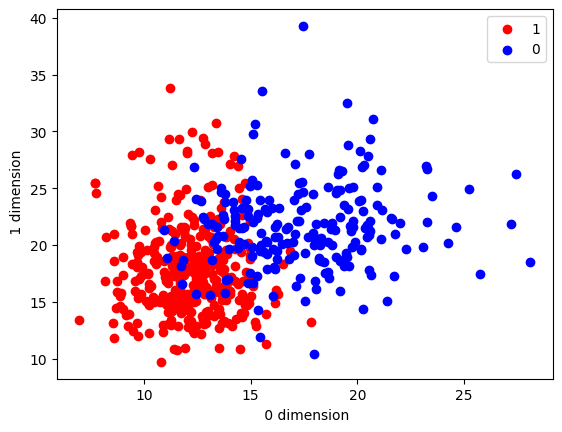

In [55]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.scatter(data.data[data.target == 1, 0], data.data[data.target == 1, 1], color='red', label='1')
plt.scatter(data.data[data.target == 0, 0], data.data[data.target == 0, 1], color='blue', label='0')
plt.xlabel(f' {0} dimension')
plt.legend(loc='best')
plt.ylabel(f' {1} dimension')
plt.show()







In [75]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<Axes: >

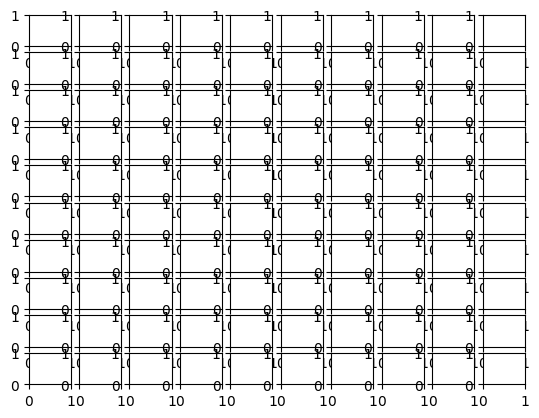

In [72]:
fig, axs = plt.subplots(10, 10)

axs[0, 0]

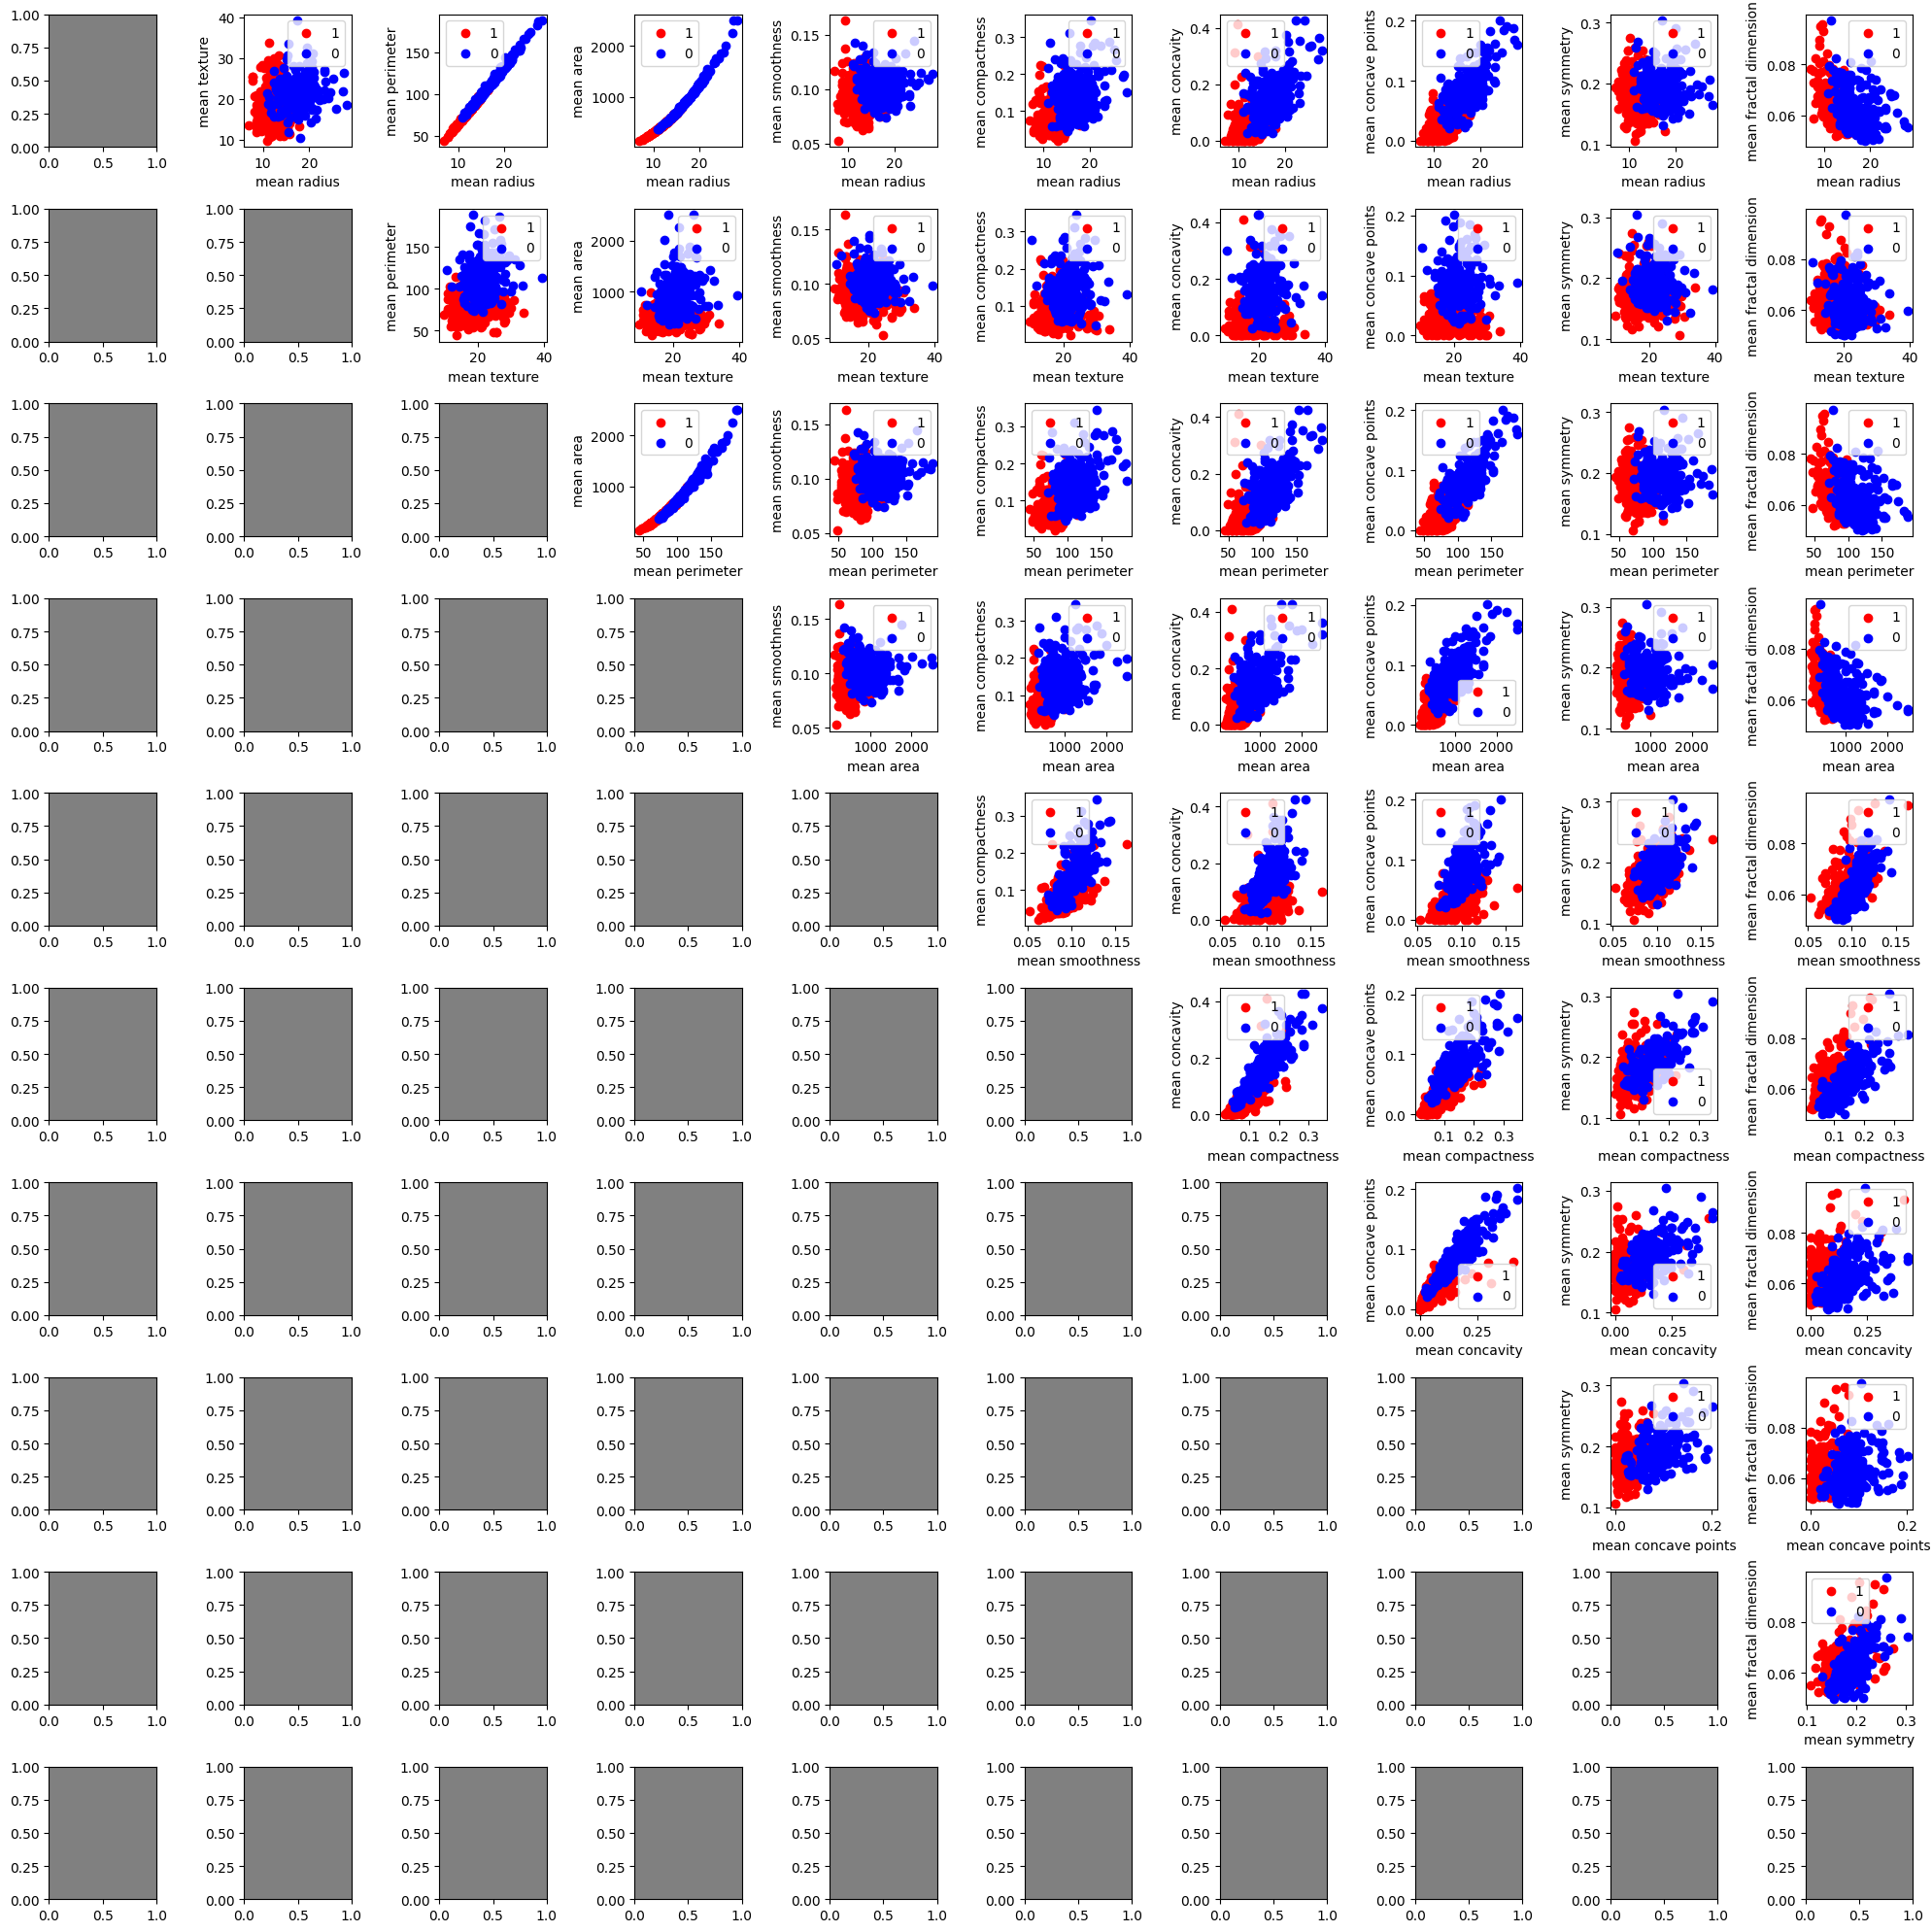

In [164]:
#create a function that creates all the graphs up until the last dimension
#data, target, last_dim
def graph_dimensional_generator(data, target, final_dime):
    fig, axs = plt.subplots(final_dime, final_dime, figsize=(20, 20))
    for i in range(final_dime):
        for e in range(final_dime):
            if i != e and i < e:
                axs[i, e].scatter(data.data[target == 1, i], data.data[target == 1, e], color='red', label='1')
                axs[i, e].scatter(data.data[target == 0, i], data.data[target == 0, e], color='blue', label='0')
                axs[i, e].set(xlabel=data.feature_names[i], ylabel=data.feature_names[e])
                axs[i, e].legend(loc='best')
            else:
                axs[i, e].set(facecolor='gray')
    plt.tight_layout()
    plt.show()
graph_dimensional_generator(data, data.target, 10)

In [151]:
a = data.data[0]
b = data.data[1]
c = data.data[2]
print(np.sqrt(np.sum((c - a) ** 2)))
print(np.sqrt(np.sum((b - a) ** 2)))
print(np.sqrt(np.sum((data.data[1:, : ] - a) ** 2)))
distances = (((data.data[1:, : ] - a) ** 2).sum(axis=1))
distances.argmin()
print(data.data[337])
print(data.target[337])
print(data.target_names)


376.45576487702664
341.7302620944424
32766.400112273157
[1.877e+01 2.143e+01 1.229e+02 1.092e+03 9.116e-02 1.402e-01 1.060e-01
 6.090e-02 1.953e-01 6.083e-02 6.422e-01 1.530e+00 4.369e+00 8.825e+01
 7.548e-03 3.897e-02 3.914e-02 1.816e-02 2.168e-02 4.445e-03 2.454e+01
 3.437e+01 1.611e+02 1.873e+03 1.498e-01 4.827e-01 4.634e-01 2.048e-01
 3.679e-01 9.870e-02]
0
['malignant' 'benign']
(568,)


In [157]:
#code
#split a data set randomly 
#knn class, method feed. predict,
new_data = data.data[:3]
data.data[3:6] - new_data


array([[-6.5700e+00,  1.0000e+01, -4.5220e+01, -6.1490e+02,  2.4100e-02,
         6.3000e-03, -5.8700e-02, -4.1900e-02,  1.7800e-02,  1.8730e-02,
        -5.9940e-01,  2.5070e-01, -5.1440e+00, -1.2617e+02,  2.7110e-03,
         2.5540e-02,  2.8800e-03,  2.8000e-03,  2.9600e-02,  3.0150e-03,
        -1.0470e+01,  9.1700e+00, -8.5730e+01, -1.4513e+03,  4.7600e-02,
         2.0070e-01, -2.5000e-02, -7.9000e-03,  2.0370e-01,  5.4100e-02],
       [-2.8000e-01, -3.4300e+00,  2.2000e+00, -2.9000e+01,  1.5560e-02,
         5.4160e-02,  1.1110e-01,  3.4130e-02, -3.0000e-04,  2.1600e-03,
         2.1370e-01,  4.7400e-02,  2.0400e+00,  2.0360e+01,  6.2650e-03,
         1.1530e-02,  3.8280e-02,  5.4500e-03,  3.6700e-03,  1.5830e-03,
        -2.4500e+00, -6.7400e+00, -6.6000e+00, -3.8100e+02,  1.3600e-02,
         1.8400e-02,  1.5840e-01, -2.3500e-02, -3.8600e-02, -1.2240e-02],
       [-7.2400e+00, -5.5500e+00, -4.7430e+01, -7.2590e+02,  1.8200e-02,
         1.0100e-02, -3.9600e-02, -4.7010e-02,  1

In [49]:
#How would you implement a boundary line?
#How can you get it to do it based on the data itself?
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [153]:
print(data.data.shape)

(569, 30)


In [62]:
print(load_breast_cancer(as_frame=True))

ImportError: load_breast_cancer with as_frame=True requires pandas.